In [1]:
from glob import glob
import xarray as xr
import cftime
import nc_time_axis
import numpy as np
import matplotlib.pyplot as plt

## Read the CESM2 Data

In [2]:
CESM2_Omon = '/archive/uda/CMIP6/CMIP/NCAR/CESM2/historical/r1i1p1f1/Omon'
CESM2_Ofx = '/archive/uda/CMIP6/CMIP/NCAR/CESM2/historical/r1i1p1f1/Ofx'
CESM2_thetao = f'{CESM2_Omon}/thetao/gn/v20190308'
CESM2_volcello = f'{CESM2_Ofx}/volcello/gn/v20190308'

In [3]:
filelist = glob(f'{CESM2_thetao}/*.nc')
filelist1 = glob(f'{CESM2_volcello}/*.nc')

In [4]:
# It seems that if I don't specify chunks as they exist in the netcdf file (ncdump -sh file | grep -i chunk)
# open_mfdataset uses the size of the file as chunk. Big memory problems ensue...
CESM2_T = xr.open_mfdataset(filelist, chunks={'time': 1, 'lev': 30, 'nlat': 192, 'nlon': 160})
CESM2_V = xr.open_mfdataset(filelist1, chunks={'lev': 30, 'nlat': 192, 'nlon': 160})

/nbhome/Raphael.Dussin/anaconda3/envs/mackenzie/lib/python3.8/site-packages/xarray/conventions.py:492: SerializationWarning: variable 'thetao' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/nbhome/Raphael.Dussin/anaconda3/envs/mackenzie/lib/python3.8/site-packages/xarray/conventions.py:492: SerializationWarning: variable 'volcello' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


In [5]:
CESM2_T

<xarray.Dataset>
Dimensions:    (d2: 2, lev: 60, nlat: 384, nlon: 320, time: 1980, vertices: 4)
Coordinates:
    lat        (nlat, nlon) float64 dask.array<chunksize=(192, 160), meta=np.ndarray>
  * lev        (lev) float64 500.0 1.5e+03 2.5e+03 ... 5.125e+05 5.375e+05
    lon        (nlat, nlon) float64 dask.array<chunksize=(192, 160), meta=np.ndarray>
  * nlat       (nlat) int32 1 2 3 4 5 6 7 8 ... 377 378 379 380 381 382 383 384
  * nlon       (nlon) int32 1 2 3 4 5 6 7 8 ... 313 314 315 316 317 318 319 320
  * time       (time) object 1850-01-15 13:00:00.000007 ... 2014-12-15 12:00:00
Dimensions without coordinates: d2, vertices
Data variables:
    thetao     (time, lev, nlat, nlon) float32 dask.array<chunksize=(1, 30, 192, 160), meta=np.ndarray>
    time_bnds  (time, d2) object dask.array<chunksize=(1, 2), meta=np.ndarray>
    lat_bnds   (nlat, nlon, vertices) float32 dask.array<chunksize=(192, 160, 4), meta=np.ndarray>
    lon_bnds   (nlat, nlon, vertices) float32 dask.array<chunksize=(192, 160, 4), meta=np.ndarray>
    lev_bnds   (lev, d2) float32 dask.array<chunksize=(30, 2), meta=np.ndarray>
Attributes:
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    case_id:                15
    cesm_casename:          b.e21.BHIST.f09_g17.CMIP6-historical.001
    contact:                cesm_cmip6@ucar.edu
    creation_date:          2019-01-16T22:01:19Z
    data_specs_version:     01.00.29
    experiment:             all-forcing simulation of the recent past
    experiment_id:          historical
    external_variables:     areacello volcello
    forcing_index:          1
    frequency:              mon
    grid:                   native gx1v7 displaced pole grid (384x320 latxlon)
    grid_label:             gn
    initialization_index:   1
    institution:            National Center for Atmospheric Research, Climate...
    institution_id:         NCAR
    license:                CMIP6 model data produced by <The National Center...
    mip_era:                CMIP6
    model_doi_url:          https://doi.org/10.5065/D67H1H0V
    nominal_resolution:     100 km
    parent_activity_id:     CMIP
    parent_experiment_id:   piControl
    parent_mip_era:         CMIP6
    parent_source_id:       CESM2
    parent_time_units:      days since 0001-01-01 00:00:00
    parent_variant_label:   r1i1p1f1
    physics_index:          1
    product:                model-output
    realization_index:      1
    realm:                  ocean
    source:                 CESM2 (2017): atmosphere: CAM6 (0.9x1.25 finite v...
    source_id:              CESM2
    source_type:            AOGCM BGC
    table_id:               Omon
    tracking_id:            hdl:21.14100/672d35cd-e662-4807-8dee-7d7d5e1d4d1c
    variable_id:            thetao
    variant_info:           CMIP6 20th century experiments (1850-2014) with C...
    variant_label:          r1i1p1f1
    sub_experiment:         none
    sub_experiment_id:      none
    branch_time_in_parent:  219000.0
    branch_time_in_child:   674885.0
    branch_method:          standard
    further_info_url:       https://furtherinfo.es-doc.org/CMIP6.NCAR.CESM2.h...

In [6]:
CESM2_V

<xarray.Dataset>
Dimensions:   (d2: 2, lev: 60, nlat: 384, nlon: 320, vertices: 4)
Coordinates:
    lat       (nlat, nlon) float64 dask.array<chunksize=(192, 160), meta=np.ndarray>
  * lev       (lev) float64 500.0 1.5e+03 2.5e+03 ... 5.125e+05 5.375e+05
    lon       (nlat, nlon) float64 dask.array<chunksize=(192, 160), meta=np.ndarray>
  * nlat      (nlat) int32 1 2 3 4 5 6 7 8 9 ... 377 378 379 380 381 382 383 384
  * nlon      (nlon) int32 1 2 3 4 5 6 7 8 9 ... 313 314 315 316 317 318 319 320
Dimensions without coordinates: d2, vertices
Data variables:
    volcello  (lev, nlat, nlon) float32 dask.array<chunksize=(30, 192, 160), meta=np.ndarray>
    lat_bnds  (nlat, nlon, vertices) float32 dask.array<chunksize=(192, 160, 4), meta=np.ndarray>
    lon_bnds  (nlat, nlon, vertices) float32 dask.array<chunksize=(192, 160, 4), meta=np.ndarray>
    lev_bnds  (lev, d2) float32 dask.array<chunksize=(30, 2), meta=np.ndarray>
Attributes:
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    case_id:                15
    cesm_casename:          b.e21.BHIST.f09_g17.CMIP6-historical.001
    contact:                cesm_cmip6@ucar.edu
    creation_date:          2019-01-16T23:04:35Z
    data_specs_version:     01.00.29
    experiment:             all-forcing simulation of the recent past
    experiment_id:          historical
    external_variables:     areacello volcello
    forcing_index:          1
    frequency:              fx
    grid:                   native gx1v7 displaced pole grid (384x320 latxlon)
    grid_label:             gn
    initialization_index:   1
    institution:            National Center for Atmospheric Research, Climate...
    institution_id:         NCAR
    license:                CMIP6 model data produced by <The National Center...
    mip_era:                CMIP6
    model_doi_url:          https://doi.org/10.5065/D67H1H0V
    nominal_resolution:     100 km
    parent_activity_id:     CMIP
    parent_experiment_id:   piControl
    parent_mip_era:         CMIP6
    parent_source_id:       CESM2
    parent_time_units:      days since 0001-01-01 00:00:00
    parent_variant_label:   r1i1p1f1
    physics_index:          1
    product:                model-output
    realization_index:      1
    realm:                  ocean
    source:                 CESM2 (2017): atmosphere: CAM6 (0.9x1.25 finite v...
    source_id:              CESM2
    source_type:            AOGCM BGC
    table_id:               Ofx
    tracking_id:            hdl:21.14100/2bf9cd8c-55af-4f92-a8c8-0ac09e27dc87
    variable_id:            volcello
    variant_info:           CMIP6 20th century experiments (1850-2014) with C...
    variant_label:          r1i1p1f1
    sub_experiment:         none
    sub_experiment_id:      none
    branch_time_in_parent:  219000.0
    branch_time_in_child:   674885.0
    branch_method:          standard
    further_info_url:       https://furtherinfo.es-doc.org/CMIP6.NCAR.CESM2.h...

### do we need to rechunk? 
### How do you know when you need to/should rechunk? 
### does rechunking need to be a multiple of the first chunk?

## Calculate OHC

In [7]:
OHC = 3992 * 1025 * CESM2_T['thetao'] * CESM2_V['volcello']

In [8]:
OHC

,Array,Chunk
Bytes,116.79 GB,7.37 MB
Shape,"(1980, 60, 384, 320)","(1, 30, 192, 160)"
Count,47538 Tasks,15840 Chunks
Type,float64,numpy.ndarray


In [9]:
global_OHC_upper700m = OHC.sel(lev=slice(0,700)).sum(dim=('lev', 'nlat', 'nlon'))

In [10]:
global_OHC_upper2000m = OHC.sel(lev=slice(0,2000)).sum(dim=('lev', 'nlat', 'nlon'))

In [11]:
global_OHC_2000below = OHC.sel(lev=slice(2000,7000)).sum(dim=('lev', 'nlat', 'nlon'))

In [12]:
global_OHC = OHC.sum(dim=('lev', 'nlat', 'nlon'))

In [13]:
global_OHC_level = OHC.sum(dim=('nlat', 'nlon'))

## Go fast with dask

In [14]:
from dask.distributed import Client

client = Client("tcp://140.208.147.155:42639")
client

Client Scheduler: tcp://140.208.147.155:42639 Dashboard: http://140.208.147.155:28787/status,Cluster Workers: 0 Cores: 0 Memory: 0 B


In [15]:
%time _ = global_OHC_upper700m.load()

CPU times: user 34.3 s, sys: 148 ms, total: 34.5 s
Wall time: 1min 34s


In [16]:
%time _ = global_OHC_upper2000m.load()

CPU times: user 34.4 s, sys: 102 ms, total: 34.5 s
Wall time: 1min 16s


In [17]:
%time _ = global_OHC_2000below.load()

CPU times: user 34.5 s, sys: 107 ms, total: 34.6 s
Wall time: 1min 14s


In [18]:
%time _ = global_OHC.load()

CPU times: user 5.47 s, sys: 112 ms, total: 5.58 s
Wall time: 1min 13s


In [20]:
%time _ = global_OHC_level.load()

CPU times: user 6.18 s, sys: 165 ms, total: 6.35 s
Wall time: 1min 4s


### Compare with Zanna et al. 

In [21]:
Zanna = xr.open_dataset('/net2/rnd/Zanna_2018/OHC_GF_1870_2018.nc')
Zanna = Zanna.rename({'time (starting 1870)': 'time'})
Zanna = Zanna.set_coords(['time'])

In [22]:
dates = []
for year in Zanna['time'].values:
    dates.append(cftime.DatetimeNoLeap(year, 7, 16, hour=12))

In [23]:
Zanna['cftime'] = xr.DataArray(np.array(dates), dims='cftime')
Zanna = Zanna.set_coords(['cftime'])

In [24]:
Zanna

<xarray.Dataset>
Dimensions:               (cftime: 149, time: 149)
Coordinates:
  * time                  (time) float64 1.87e+03 1.871e+03 ... 2.018e+03
  * cftime                (cftime) object 1870-07-16 12:00:00 ... 2018-07-16 ...
Data variables:
    OHC_300m              (time) float64 ...
    error_OHC_300         (time) float64 ...
    OHC_700m              (time) float64 ...
    error_OHC_700         (time) float64 ...
    OHC_2000m             (time) float64 ...
    error_OHC_2000        (time) float64 ...
    OHC_below_2000m       (time) float64 ...
    error_OHC_below_2000  (time) float64 ...
    OHC_full_depth        (time) float64 ...
    error_OHC_full_depth  (time) float64 ...

In [25]:
def anom_yearly_avg(da):
    # compute yearly values
    yearly = da.groupby(da.time.dt.year).mean(dim='time')
    # anomamly to 1870 like in Zanna et al.
    anom = yearly - yearly.sel(year=1870)
    return anom

gOHCanom_upper700m_annual = anom_yearly_avg(global_OHC_upper700m)
gOHCanom_upper2000m_annual = anom_yearly_avg(global_OHC_upper2000m)
gOHCanom_2000below_annual = anom_yearly_avg(global_OHC_2000below)
gOHCanom_annual = anom_yearly_avg(global_OHC)

## Plot Results

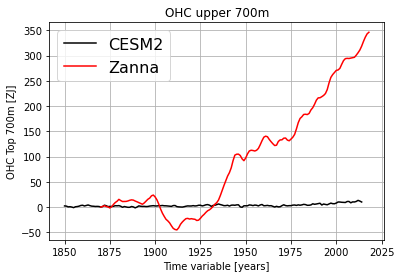

In [26]:
plt.figure()
ax = plt.axes()
(gOHCanom_upper700m_annual / 1e21).plot(ax=ax, label='CESM2', color='k')
Zanna['OHC_700m'].plot(ax=ax, label='Zanna', color='r')
plt.legend(fontsize=16)
plt.title('OHC upper 700m')
plt.grid()

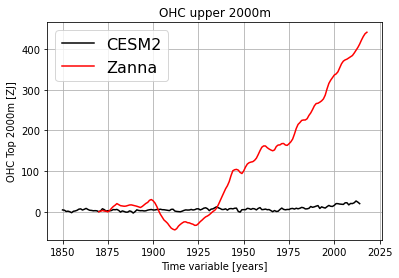

In [27]:
plt.figure()
ax = plt.axes()
(gOHCanom_upper2000m_annual / 1e21).plot(ax=ax, label='CESM2', color='k')
Zanna['OHC_2000m'].plot(ax=ax, label='Zanna', color='r')
plt.legend(fontsize=16)
plt.title('OHC upper 2000m')
plt.grid()

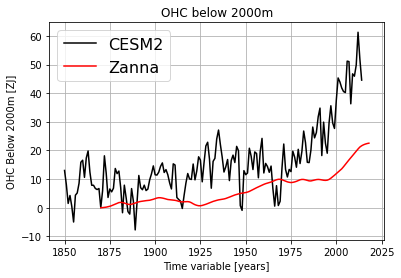

In [28]:
plt.figure()
ax = plt.axes()
(gOHCanom_2000below_annual / 1e21).plot(ax=ax, label='CESM2', color='k')
Zanna['OHC_below_2000m'].plot(ax=ax, label='Zanna', color='r')
plt.legend(fontsize=16)
plt.title('OHC below 2000m')
plt.grid()

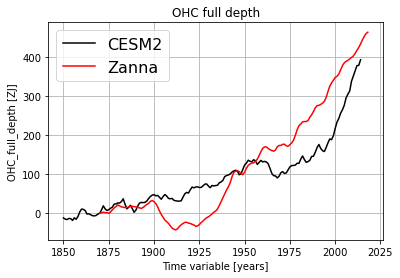

In [29]:
plt.figure()
ax = plt.axes()
(gOHCanom_annual / 1e21).plot(ax=ax, label='CESM2', color='k')
Zanna['OHC_full_depth'].plot(ax=ax, label='Zanna', color='r')
plt.legend(fontsize=16)
plt.title('OHC full depth')
plt.grid()

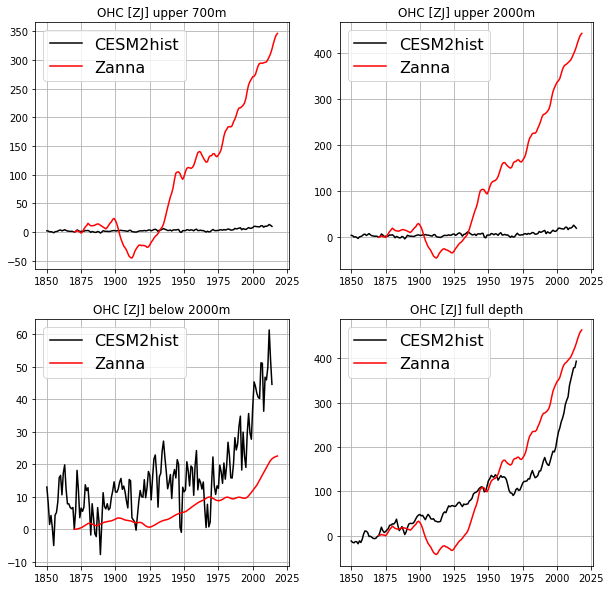

distributed.client - ERROR - Failed to reconnect to scheduler after 10.00 seconds, closing client
_GatheringFuture exception was never retrieved
future: <_GatheringFuture finished exception=CancelledError()>
asyncio.exceptions.CancelledError


In [30]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=[10,10])

(gOHCanom_upper700m_annual / 1e21).plot(ax=axs[0,0], label='CESM2hist', color='k')
Zanna['OHC_700m'].plot(ax=axs[0,0], label='Zanna', color='r')
axs[0,0].legend(fontsize=16)
axs[0,0].set_title('OHC [ZJ] upper 700m')
axs[0,0].set_xlabel("")
axs[0,0].set_ylabel("")
axs[0,0].grid()

(gOHCanom_upper2000m_annual / 1e21).plot(ax=axs[0,1], label='CESM2hist', color='k')
Zanna['OHC_2000m'].plot(ax=axs[0,1], label='Zanna', color='r')
axs[0,1].legend(fontsize=16)
axs[0,1].set_title('OHC [ZJ] upper 2000m')
axs[0,1].set_xlabel("")
axs[0,1].set_ylabel("")
axs[0,1].grid()

(gOHCanom_2000below_annual / 1e21).plot(ax=axs[1,0], label='CESM2hist', color='k')
Zanna['OHC_below_2000m'].plot(ax=axs[1,0], label='Zanna', color='r')
axs[1,0].legend(fontsize=16)
axs[1,0].set_title('OHC [ZJ] below 2000m')
axs[1,0].set_xlabel("")
axs[1,0].set_ylabel("")
axs[1,0].grid()

(gOHCanom_annual / 1e21).plot(ax=axs[1,1], label='CESM2hist', color='k')
Zanna['OHC_full_depth'].plot(ax=axs[1,1], label='Zanna', color='r')
axs[1,1].legend(fontsize=16)
axs[1,1].set_title('OHC [ZJ] full depth')
axs[1,1].set_xlabel("")
axs[1,1].set_ylabel("")
axs[1,1].grid()